# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# testing api Key
url = "https://api.openweathermap.org/data/2.5/weather?"
city_P = "Paris"
query_url = url +  "appid=" + weather_api_key + "&q=" + city_P

weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(f"The weather API responded with: {weather_json}.")
print(f'{url}appid={weather_api_key}&q={city_P}')

The weather API responded with: {'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 276.93, 'feels_like': 274.49, 'temp_min': 276.15, 'temp_max': 278.15, 'pressure': 1027, 'humidity': 100}, 'visibility': 4300, 'wind': {'speed': 1.54, 'deg': 280}, 'clouds': {'all': 91}, 'dt': 1615872306, 'sys': {'type': 1, 'id': 6550, 'country': 'FR', 'sunrise': 1615874509, 'sunset': 1615917402}, 'timezone': 3600, 'id': 2988507, 'name': 'Paris', 'cod': 200}.
https://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&q=Paris


In [4]:
print (cities)


['nizhneyansk', 'tigil', 'codrington', 'mar del plata', 'casino', 'hithadhoo', 'kavaratti', 'bambous virieux', 'domoni', 'tasiilaq', 'salalah', 'chuy', 'rikitea', 'avera', 'hilo', 'gashua', 'lorengau', 'saint-philippe', 'bredasdorp', 'outlook', 'qurayyat', 'avarua', 'severnyy', 'taolanaro', 'khatanga', 'ushuaia', 'qiongshan', 'bubaque', 'illoqqortoormiut', 'thompson', 'leningradskiy', 'vrangel', 'sao filipe', 'touros', 'kavieng', 'togur', 'xichang', 'bluff', 'albany', 'port lincoln', 'kieta', 'bengkulu', 'bathsheba', 'sete', 'sharlyk', 'mataura', 'hofn', 'sentyabrskiy', 'busselton', 'arcata', 'kutum', 'seydi', 'saskylakh', 'yunyang', 'sibolga', 'cidreira', 'vaitupu', 'el rosario', 'axim', 'jamestown', 'weligama', 'sorland', 'bairiki', 'tuktoyaktuk', 'x-can', 'ulladulla', 'qaanaaq', 'sola', 'dingle', 'cayenne', 'ballina', 'cabo san lucas', 'beyneu', 'atuona', 'ostrovnoy', 'maneadero', 'talavera de la reina', 'wahran', 'upernavik', 'mareeba', 'hermanus', 'hobart', 'vaini', 'barentsburg',

In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = F'{url}appid={weather_api_key}&units={units}&q='
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -27.0667,
        "lat": 38.7333
    },
    "weather": [
        {
            "id": 300,
            "main": "Drizzle",
            "description": "light intensity drizzle",
            "icon": "09n"
        },
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 59.43,
        "feels_like": 57.36,
        "temp_min": 59,
        "temp_max": 60.01,
        "pressure": 1023,
        "humidity": 100
    },
    "visibility": 2500,
    "wind": {
        "speed": 9.1,
        "deg": 173
    },
    "clouds": {
        "all": 75
    },
    "dt": 1615873482,
    "sys": {
        "type": 1,
        "id": 6895,
        "country": "PT",
        "sunrise": 1615881472,
        "sunset": 1615924555
    },
    "timezone": -3600,
    "id": 3372760,
    "name": "Praia da Vit\u00f3ria",
    "cod": 200
}
<Response [200]>
http://api.op

In [6]:
print(requests.get(query_url + city))

<Response [200]>


In [25]:
# set up for statment for the Data retrival. we have 600 records to look up 
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

City_Name = []
C_Country = []
C_date = []
c_latt = []
c_long = []
c_max_temp = []
c_pressure = []
c_humidity = []
c_cloudiness = []
c_wind_speed = []

counter= 1
Set_counter = 1

#Inital stages - begining of line 
print ("Beginning Data Retrieval")
print ("--------------------------------------------")

for city in cities:
    try:
        #city1 = city.replace(" ", "%20")
        #print(city)
        response = requests.get(query_url + city).json()
        #print(response)
        print(F'{url}appid={weather_api_key}&units={units}&q={city}')
        City_Name.append(response["name"])
        C_Country.append(response["sys"]["country"])
        C_date.append(response["dt"])
        c_latt.append(response["coord"]["lat"])
        c_long.append(response["coord"]["lon"])
        c_max_temp.append(response["main"]["temp_max"])
        c_pressure.append(response["main"]["pressure"])
        c_humidity.append(response["main"]["humidity"])
        c_cloudiness.append(response["clouds"]["all"])
        c_wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {counter} of set {Set_counter} | {city}")
        counter += 1
    except:
        print(f"City {city} not found. Skipping...") 
    if counter == 51:
        counter = 1
        Set_counter = Set_counter +1
            
    pass
    
#closing line
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
--------------------------------------------
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=nizhneyansk
City nizhneyansk not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=tigil
Processing Record 1 of set 1 | tigil
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=codrington
Processing Record 2 of set 1 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=mar del plata
Processing Record 3 of set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=casino
Processing Record 4 of set 1 | casino
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=hithadhoo
Processing Record 5 of set 1 | hithadhoo
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=sibolga
Processing Record 1 of set 2 | sibolga
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=cidreira
Processing Record 2 of set 2 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=vaitupu
City vaitupu not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=el rosario
Processing Record 3 of set 2 | el rosario
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=axim
Processing Record 4 of set 2 | axim
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=jamestown
Processing Record 5 of set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=margate
Processing Record 3 of set 3 | margate
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=pisco
Processing Record 4 of set 3 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=clinton
Processing Record 5 of set 3 | clinton
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=attawapiskat
City attawapiskat not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=new norfolk
Processing Record 6 of set 3 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=kamenka
Processing Record 7 of set 3 | kamenka
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&uni

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=buala
Processing Record 2 of set 4 | buala
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=itaueira
Processing Record 3 of set 4 | itaueira
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=ketchikan
Processing Record 4 of set 4 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=kargat
Processing Record 5 of set 4 | kargat
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=hasaki
Processing Record 6 of set 4 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=mikuni
Processing Record 7 of set 4 | mikuni
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=f

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=chagda
City chagda not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=mayumba
Processing Record 5 of set 5 | mayumba
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=bitung
Processing Record 6 of set 5 | bitung
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=morant bay
Processing Record 7 of set 5 | morant bay
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=ekhabi
Processing Record 8 of set 5 | ekhabi
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=la ronge
Processing Record 9 of set 5 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=kruisfontein
Processing Record 7 of set 6 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=umm lajj
Processing Record 8 of set 6 | umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=banjar
Processing Record 9 of set 6 | banjar
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=robe
Processing Record 10 of set 6 | robe
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=arman
Processing Record 11 of set 6 | arman
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=vysokogornyy
Processing Record 12 of set 6 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&u

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=butembo
Processing Record 7 of set 7 | butembo
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=maceio
Processing Record 8 of set 7 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=bandarbeyla
Processing Record 9 of set 7 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=les cayes
Processing Record 10 of set 7 | les cayes
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=provideniya
Processing Record 11 of set 7 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=ndele
Processing Record 12 of set 7 | ndele
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd81

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=rincon
Processing Record 7 of set 8 | rincon
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=hovd
Processing Record 8 of set 8 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=hanting
Processing Record 9 of set 8 | hanting
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=hambantota
Processing Record 10 of set 8 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=namatanai
Processing Record 11 of set 8 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=cap-aux-meules
Processing Record 12 of set 8 | cap-aux-meules
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=bireun
Processing Record 10 of set 9 | bireun
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=kegums
Processing Record 11 of set 9 | kegums
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=isangel
Processing Record 12 of set 9 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=dzerzhinsk
Processing Record 13 of set 9 | dzerzhinsk
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=eenhana
Processing Record 14 of set 9 | eenhana
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=poplar bluff
Processing Record 15 of set 9 | poplar bluff
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=saint-raymond
Processing Record 13 of set 10 | saint-raymond
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=fortuna
Processing Record 14 of set 10 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=maarianhamina
Processing Record 15 of set 10 | maarianhamina
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=tiarei
Processing Record 16 of set 10 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=gat
Processing Record 17 of set 10 | gat
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=jiddah
City jiddah not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=teeli
Processing Record 9 of set 11 | teeli
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=ahmadpur
Processing Record 10 of set 11 | ahmadpur
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=sioux lookout
Processing Record 11 of set 11 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=roald
Processing Record 12 of set 11 | roald
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=nzega
Processing Record 13 of set 11 | nzega
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=polis
Processing Record 14 of set 11 | polis
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units

http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=amursk
Processing Record 13 of set 12 | amursk
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=jinja
Processing Record 14 of set 12 | jinja
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=mindif
Processing Record 15 of set 12 | mindif
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=mullaitivu
City mullaitivu not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=hualmay
Processing Record 16 of set 12 | hualmay
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd8146&units=imperial&q=santa rosalia
Processing Record 17 of set 12 | santa rosalia
http://api.openweathermap.org/data/2.5/weather?appid=08728989b0687b875ff513b21bfd81

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
weather_dict = {
    "City": City_Name,
    "Country": C_Country,
    "Lat": c_latt,
    "Lng": c_long,
    "Max Temp": c_max_temp,
    "Pressure": c_pressure,
    "Humidity": c_humidity,
    "Cloudiness": c_cloudiness,
    "Wind Speed": c_wind_speed,
    "Date": C_date
}

weather_data = pd.DataFrame(weather_dict)
#weather_data.count()
weather_data.head()

,City,Country,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Date
0,Tigil',RU,57.8000,158.6667,34.41,1010,80,0,3.76,1615873959
1,Codrington,AU,-38.2667,141.9667,62.76,1024,65,39,10.54,1615873959
2,Mar del Plata,AR,-38.0023,-57.5575,70.00,1013,88,100,9.22,1615873901
3,Casino,AU,-28.8667,153.0500,69.80,1020,83,100,4.61,1615873960
4,Hithadhoo,MV,-0.6000,73.0833,82.29,1011,72,99,8.16,1615873960


In [122]:
weather_data.to_csv("cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [123]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data['Humidity']>100]

,City,Country,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Date


In [124]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(weather_data.loc[weather_data['Humidity']<=100])
clean_city_data.head()

,City,Country,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Date
0,Tigil',RU,57.8000,158.6667,34.41,1010,80,0,3.76,1615873959
1,Codrington,AU,-38.2667,141.9667,62.76,1024,65,39,10.54,1615873959
2,Mar del Plata,AR,-38.0023,-57.5575,70.00,1013,88,100,9.22,1615873901
3,Casino,AU,-28.8667,153.0500,69.80,1020,83,100,4.61,1615873960
4,Hithadhoo,MV,-0.6000,73.0833,82.29,1011,72,99,8.16,1615873960


In [125]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data_new=pd.DataFrame(weather_data.drop(weather_data['Humidity']>100, inplace=False))
#clean_city_data_new.head()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

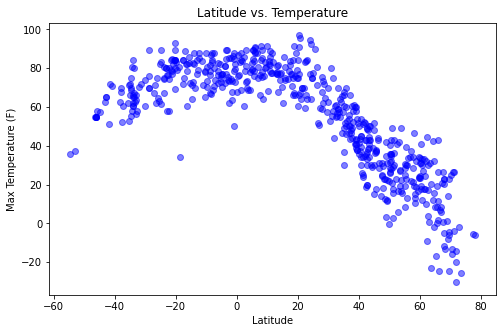

In [126]:
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Latitude vs. Temperature')
plt.savefig("1-LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

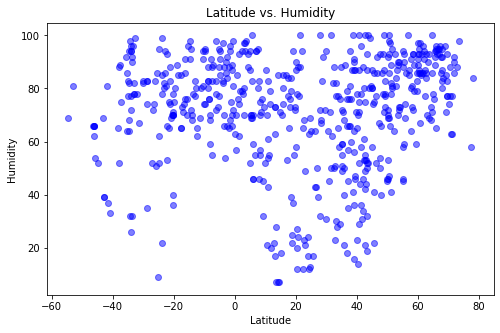

In [127]:
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs. Humidity')
plt.savefig("2-LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

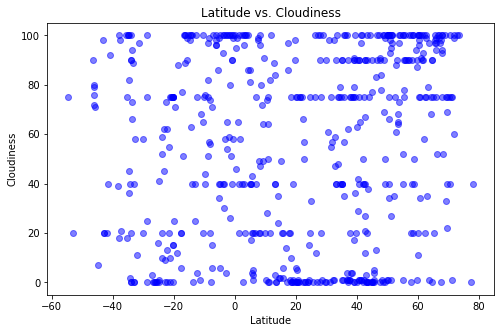

In [128]:
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs. Cloudiness')
plt.savefig("3-LatVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

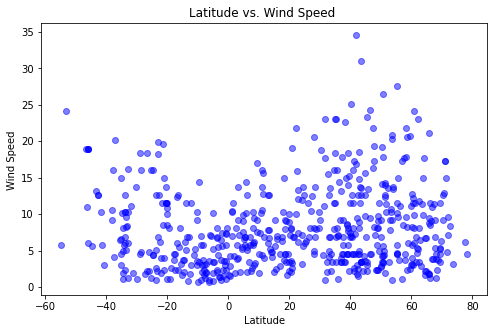

In [129]:
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ')
plt.title(f'Latitude vs. Wind Speed ')
plt.savefig("4-LatVsWindSpeed .png")
plt.show()

## Linear Regression

In [130]:
Northdata = pd.DataFrame(clean_city_data.loc[clean_city_data['Lat']>=0])
Northdata.head()


,City,Country,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Date
0,Tigil',RU,57.8000,158.6667,34.41,1010,80,0,3.76,1615873959
5,Kavaratti,IN,10.5669,72.6420,83.62,1012,70,28,10.11,1615873960
8,Tasiilaq,GL,65.6145,-37.6368,19.45,1004,92,100,21.07,1615873961
9,Salalah,OM,17.0151,54.0924,78.80,1016,53,0,4.61,1615874053
12,Avera,US,33.1940,-82.5271,59.00,1020,82,90,6.91,1615874504


In [131]:
southdata = pd.DataFrame(clean_city_data.loc[clean_city_data['Lat']<0])
southdata.head()

,City,Country,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Date
1,Codrington,AU,-38.2667,141.9667,62.76,1024,65,39,10.54,1615873959
2,Mar del Plata,AR,-38.0023,-57.5575,70.00,1013,88,100,9.22,1615873901
3,Casino,AU,-28.8667,153.0500,69.80,1020,83,100,4.61,1615873960
4,Hithadhoo,MV,-0.6000,73.0833,82.29,1011,72,99,8.16,1615873960
6,Bambous Virieux,MU,-20.3428,57.7575,84.20,1014,70,75,11.50,1615873961


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

slope:-1.2529398460802732
intercept:94.26001663214885
rvalue :-0.9010637113853592
pvalue :1.1551531536493058e-148
Correlation coefficient:-0.9
stderr:0.030002689120250836
line_eq :y = -1.25x + 94.26


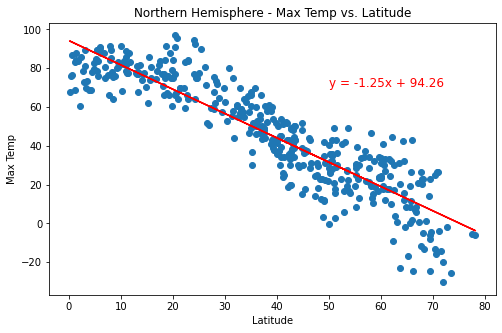

In [132]:
import scipy.stats as st

xvlaue = Northdata['Lat']
yvlaue = Northdata['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(line_eq, xy=(50, 70),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("5-NortherthMaxTempVSLatitude.png")

plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

slope:0.45747136448005304
intercept:82.43708268808169
rvalue :0.558776229473919
pvalue :7.692000785106423e-16
Correlation coefficient:0.56
stderr:0.0514721969787691
line_eq :y = 0.46x + 82.44


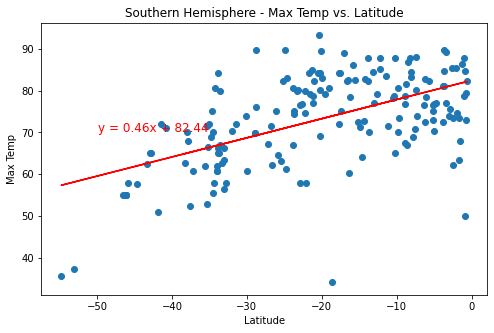

In [133]:

xvlaue = southdata['Lat']
yvlaue = southdata['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(line_eq, xy=(-50, 70),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("5-SouthMaxTempVSLatitude.png")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope:0.33110116384009347
intercept:56.78346104785793
rvalue :0.2947558780465515
pvalue :1.3962052000125684e-09
Correlation coefficient:0.29
stderr:0.05340368596321506
line_eq :y = 0.33x + 56.78


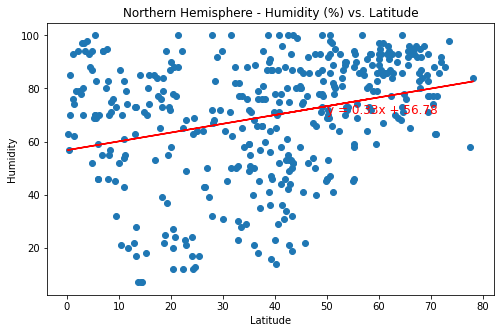

In [134]:
xvlaue = Northdata['Lat']
yvlaue = Northdata['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(line_eq, xy=(50, 70),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("8-Northerth_HumidityVSLatitude.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope:0.35296739883772366
intercept:82.53326475798612
rvalue :0.2852569945824603
pvalue :0.00012432526865184082
Correlation coefficient:0.29
stderr:0.08990702207537177
line_eq :y = 0.35x + 82.53


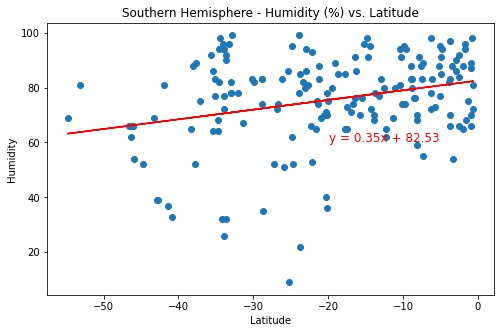

In [135]:
xvlaue = southdata['Lat']
yvlaue = southdata['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(line_eq, xy=(-20, 60),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("8-south_HumidityVSLatitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope:0.48725469556963025
intercept:35.87723528266439
rvalue :0.25671747196780165
pvalue :1.5634935973014523e-07
Correlation coefficient:0.26
stderr:0.09126530545965396
line_eq :y = 0.49x + 35.88


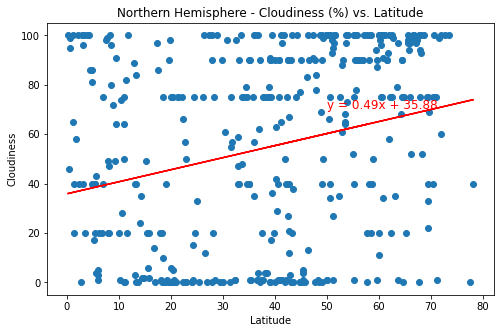

In [136]:
xvlaue = Northdata['Lat']
yvlaue = Northdata['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(line_eq, xy=(50, 70),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("6-Northerth_CloudinessVSLatitude.png")

plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope:0.44068528394808
intercept:64.0253236061597
rvalue :0.1640623443618545
pvalue :0.0295710670529677
Correlation coefficient:0.16
stderr:0.2008723108140231
line_eq :y = 0.44x + 64.03


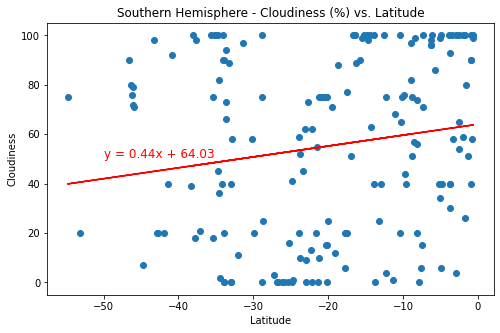

In [137]:
xvlaue = southdata['Lat']
yvlaue = southdata['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(line_eq, xy=(-50, 50),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("6-south_CloudinessVSLatitude.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope:0.026462659404772857
intercept:7.605377849095326
rvalue :0.09382544409359686
pvalue :0.05890924115144372
Correlation coefficient:0.09
stderr:0.01397018375098862
line_eq :y = 0.03x + 7.61


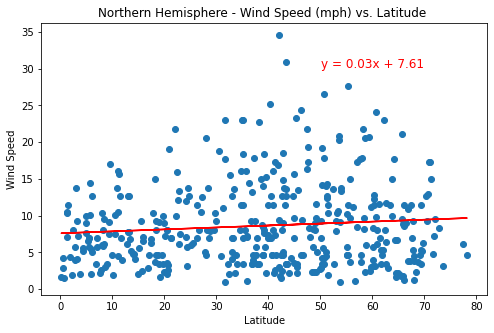

In [138]:
xvlaue = Northdata['Lat']
yvlaue = Northdata['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude ')
plt.annotate(line_eq, xy=(50, 30),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("7-Northerth_WindSpeedVSLatitude.png")

plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope:-0.17385038026330543
intercept:3.3681653658891797
rvalue :-0.45022484654277384
pvalue :3.625519064613462e-10
Correlation coefficient:-0.45
stderr:0.026138567759470772
line_eq :y = -0.17x + 3.37


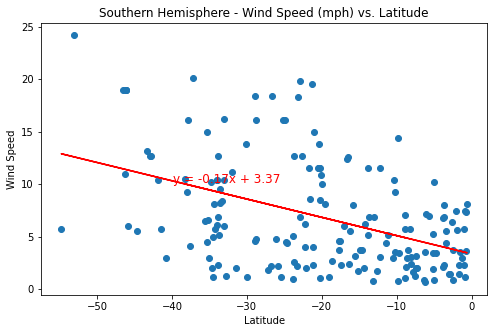

In [139]:
xvlaue = southdata['Lat']
yvlaue = southdata['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvlaue, yvlaue)
regress_values = xvlaue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_Vol=round(st.pearsonr(xvlaue,yvlaue)[0],2)

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue :{rvalue}")
print(f"pvalue :{pvalue}")
print(f"Correlation coefficient:{corr_Vol}")
print(f"stderr:{stderr}")
print(f"line_eq :{line_eq}")


plt.figure(figsize=(8,5))
plt.scatter(xvlaue,yvlaue)
plt.plot(xvlaue,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.annotate(line_eq, xy=(-40, 10),xytext=(0.5, 0.95), textcoords='offset points', fontsize=12,color="red")
plt.savefig("7-south_WindSpeedVSLatitude.png")

plt.show()